# Algorithm performance and running time comparison on synthetic data (Figures 2,3)

In this notebook we produce plots to compare the performance of the algorithms presented in the paper in terms of utility for instances with general costs. The resulting plot is presented in Figure 3.

**Required script execution:** khayyam.sh

In [1]:
import os
os.chdir("../../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
from lib import utils
sns.set_context("paper", font_scale=4)

In [3]:
name="khayyam"
final_df = []
cols = sns.color_palette("Set2",9)
col_dict = {"Non-Strategic": cols[0],
            "Bruteforce": cols[1],
            "Threshold": cols[2],
            "Iterative": cols[3],
            "DP": cols[5]
           }
linestyles_dict = {"Non-Strategic": "-.",
            "Bruteforce": "-",
            "Threshold": "-",
            "Iterative": "--",
            "DP": ":"
           }
markers_dict = {"Non-Strategic": "v",
            "Bruteforce": "s",
            "Threshold": "^",
            "Iterative": "o",
            "DP": "D"
           }

In [4]:
files = glob.glob("./outputs/optimal/{name}_bruteforce*_config.json".format(name=name))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "seed", "kappa", "sparsity", "time", "pi", "bruteforce_br"], var_name="algorithm", value_name="utility"))

In [5]:
files = glob.glob("./outputs/optimal/{name}_thres*_config.json".format(name=name))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "seed", "kappa", "sparsity", "time", "pi", "strategic_threshold_br"], var_name="algorithm", value_name="utility"))

In [6]:
files = glob.glob("./outputs/optimal/{name}_iterative*_config.json".format(name=name))
data = []

for fi in files:
    with open(fi,"r") as file:
        data.append(json.load(file))
df_standard = pd.DataFrame(data)
final_df.append(df_standard.melt(id_vars=["m", "seed", "kappa", "sparsity", "time", "parallel", "split_components", "iterations", "pi", "strategic_br", "pi_non_strategic", "non_strategic_br", "strategic_deter_br", "pi_strategic_deter", "strategic_deter"], var_name="algorithm", value_name="utility"))

In [7]:
df = pd.concat(final_df)
df['algorithm'][df['algorithm']=="strategic"] = df['algorithm'][df['algorithm']=="strategic"]+df['parallel'][df['algorithm']=="strategic"].astype(str)

In [8]:
df['algorithm'].unique()

array(['bruteforce', 'strategic_threshold', 'strategicTrue',
       'strategicFalse', 'non_strategic'], dtype=object)

In [9]:
df['algorithm'] = df['algorithm'].str.replace("bruteforce", "Bruteforce")
df['algorithm'] = df['algorithm'].str.replace("non_strategic", "Non-Strategic")
df['algorithm'] = df['algorithm'].str.replace("strategic_threshold", "Threshold")
df['algorithm'] = df['algorithm'].str.replace("strategicTrue", "Parallel")
df['algorithm'] = df['algorithm'].str.replace("strategicFalse", "Iterative")

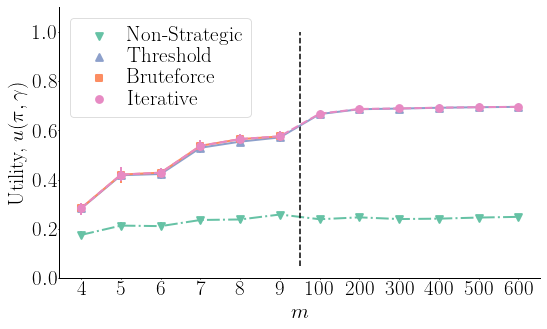

In [10]:
utils.latexify(5,5, font_scale=3)
temp_df = df
temp_df.sort_values(["algorithm"], inplace=True)
hue_order=["Non-Strategic", "Threshold", "Bruteforce", "Iterative"]
# hue_order=["Non-Strategic", "Threshold", "Bruteforce", "Iterative", "Parallel"]
linestyles = [linestyles_dict[algo] for algo in hue_order]
markers = [markers_dict[algo] for algo in hue_order]
g = sns.catplot(x="m", y="utility", hue="algorithm", data=temp_df, kind="point", hue_order=hue_order,
            aspect=1.6,legend=False,palette=col_dict ,linestyles=linestyles,
           markers=markers,ci=40)
plt.setp(g.ax.lines,linewidth=2)
plt.vlines(5.5,0.05,1.0,linestyle="--")
plt.legend(shadow=None, loc=2,labelspacing=0.1, handletextpad=0.3)
plt.ylabel("Utility, $u(\\pi, \\gamma)$")
plt.xlabel("$m$")
plt.ylim(0,1.1)
plt.savefig("./figures/optimal/{name}_u.pdf".format(name=name),bbox_inches='tight', )